# Time Series

In [ ]:
#Time series data is an important form of structured data in many different fields, such
#as finance, economics, ecology, neuroscience, and physics. Anything that is observed
#or measured at many points in time forms a time series. Many time series are fixed
#frequency, which is to say that data points occur at regular intervals according to some
#rule, such as every 15 seconds, every 5 minutes, or once per month. Time series can
#also be irregular without a fixed unit of time or offset between units

Different ways of marking time stamp :
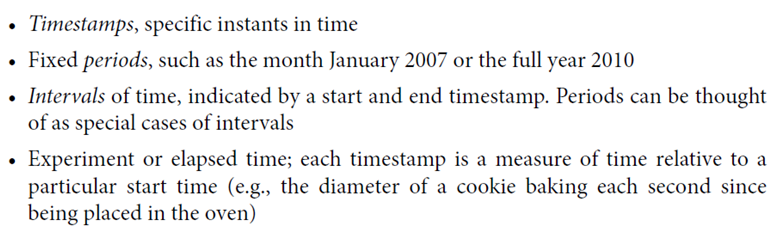


The simplest and most widely used kind of time series are
those indexed by timestamp.

In [ ]:
#pandas provides many built-in time series tools and data algorithms. You can efficiently
#work with very large time series and easily slice and dice, aggregate, and
#resample irregular- and fixed-frequency time series. Some of these tools are especially
#useful for financial and economics applications, but you could certainly use them to
#analyze server log data, too.

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [ ]:
#The Python standard library includes data types for date and time data, as well as
#calendar-related functionality. The datetime, time, and calendar modules are the
#main places to start.


from datetime import datetime
now = datetime.now()
print(now)
print(now.year, now.month, now.day)
print(type(now))

2021-04-15 02:18:59.400114
2021 4 15
<class 'datetime.datetime'>


In [ ]:
#datetime stores both the date and time down to the microsecond. 
#timedelta represents the temporal difference between two datetime objects:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print(delta.days)
print(delta.seconds)

926 days, 15:45:00
926
56700


In [ ]:
#You can add (or subtract) a timedelta or multiple thereof to a datetime object to
#yield a new shifted object:
from datetime import timedelta

#Creating a datetime.datetime object
start = datetime(2011, 1, 7)


print(start + timedelta(12))

print(start - 2 * timedelta(12))

print(type(timedelta()))

2011-01-19 00:00:00
2010-12-14 00:00:00
<class 'datetime.timedelta'>


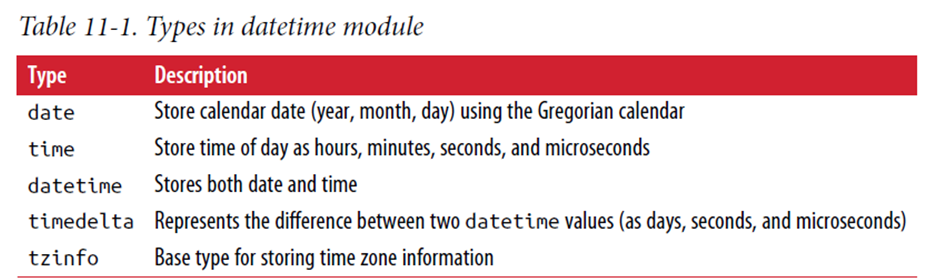

### Converting Between String and Datetime

In [ ]:
#You can format datetime objects and pandas Timestamp objects, 
#as strings using str or the strftime method, passing a format specification:
stamp = datetime(2011, 1, 3)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

2011-01-03 00:00:00
2011-01-03


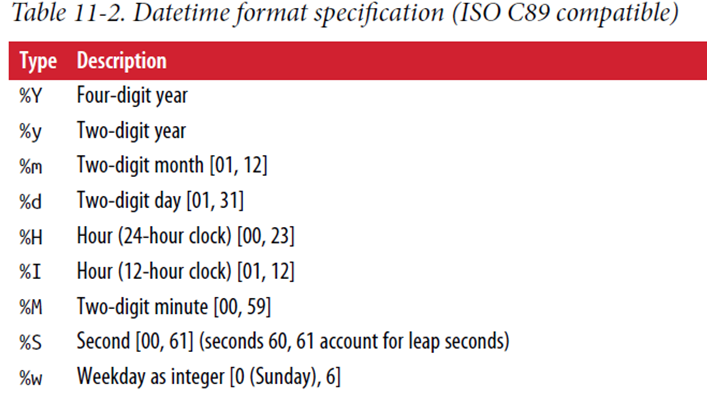

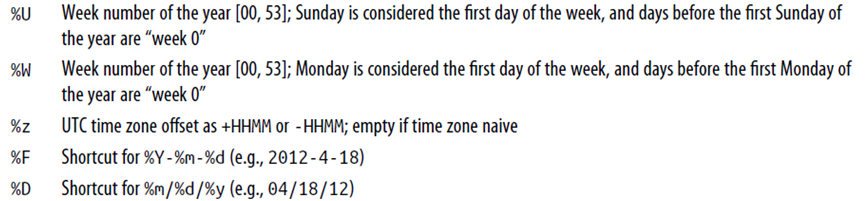

In [ ]:
#convert strings to dates using date time.strptime
value = '2011-01-03'
type(value)

str

In [ ]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')


datetime.datetime(2011, 1, 3, 0, 0)

In [ ]:
#list of strings
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [ ]:
#datetime.strptime is a good way to parse a date with a known format. However, it
#can be a bit annoying to have to write a format spec each time, especially for common
#date formats. In this case, you can use the parser.parse method in the third-party
#dateutil package (this is installed automatically when you install pandas):

from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [ ]:
#dateutil is capable of parsing most human-intelligible date representations
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [ ]:
#In international locales, day appearing before month is very common, so you can pass
#dayfirst=True to indicate this
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [ ]:
#pandas is generally oriented toward working with arrays of dates, whether used as an
#axis index or a column in a DataFrame. The to_datetime method parses many different
#kinds of date representations.
#List of strings
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']


#Convert list of strings to datetime index
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
#It also handles values that should be considered missing (None, empty string, etc.):
idx = pd.to_datetime(datestrs + [None])
print(type(idx))
print(idx)
print(idx[2])
pd.isnull(idx)


#NaT (Not a Time) is pandas’s null value for timestamp data

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT


array([False, False,  True])

dateutil.parser is a useful but imperfect tool. Notably, it will recognize
some strings as dates that you might prefer that it didn’t—
for example, '42' will be parsed as the year 2042 with today’s calendar
date

datetime objects also have a number of locale-specific formatting options for systems in other countries or languages. For example, the abbreviated month names will be different on German or French systems compared with English systems
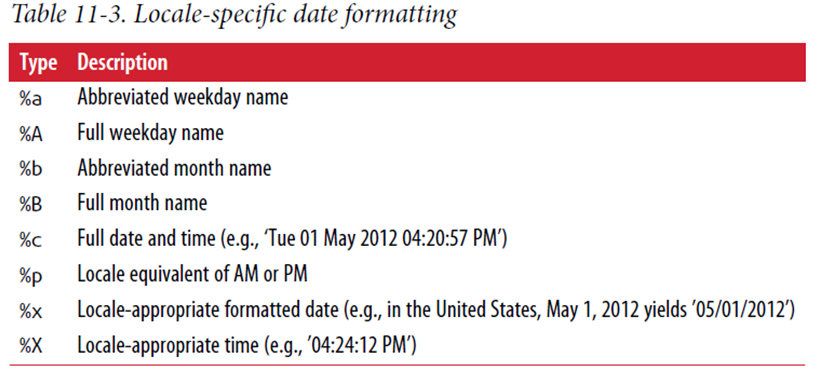

## Time Series Basics

In [ ]:
#A basic kind of time series object in pandas is a Series indexed by timestamps, which
#is often represented external to pandas as Python strings or datetime objects:
#from datetime import datetime
#list with datetime objects
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
print(type(dates))
l=[1,-2,3,2,-3,4]
ts = pd.Series(l, index=dates)
ts

<class 'list'>


2011-01-02    1
2011-01-05   -2
2011-01-07    3
2011-01-08    2
2011-01-10   -3
2011-01-12    4
dtype: int64

In [ ]:
#these datetime objects have been put in a DatetimeIndex:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
#Like other Series, arithmetic operations between differently indexed time series automatically
#align on the dates:
print(ts[::2])


print(ts + ts[::2])
#ts[::2] selects every second element in ts.

2011-01-02    1
2011-01-07    3
2011-01-10   -3
dtype: int64
2011-01-02    2.0
2011-01-05    NaN
2011-01-07    6.0
2011-01-08    NaN
2011-01-10   -6.0
2011-01-12    NaN
dtype: float64


In [ ]:
#pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond
#resolution:
ts.index.dtype

dtype('<M8[ns]')

In [ ]:
#Scalar values from a DatetimeIndex are pandas Timestamp objects:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [ ]:
#Time series behaves like any other pandas.Series when you are indexing and selecting
#data based on label:
stamp = ts.index[2] 
ts[stamp]

3

In [ ]:
#you can also pass a string that is interpretable as a date
print(ts['1/10/2011'])
ts['20110110']

-3


-3

In [ ]:
#For longer time series, a year or only a year and month can be passed to easily select
#slices of data:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']

2001-01-01   -1.610841
2001-01-02   -1.026621
2001-01-03    1.241573
2001-01-04   -0.156760
2001-01-05   -2.449096
                ...   
2001-12-27    1.578948
2001-12-28    0.000369
2001-12-29    0.900885
2001-12-30   -0.454869
2001-12-31   -0.864547
Freq: D, Length: 365, dtype: float64

In [ ]:
#the string '2001' is interpreted as a year and selects that time period. This also
#works if you specify the month:
longer_ts['2001-05']


#From January 1st 2000  1000 days

2001-05-01   -0.962791
2001-05-02    0.080067
2001-05-03    0.128726
2001-05-04   -0.479120
2001-05-05   -0.640281
                ...   
2001-05-27    1.221655
2001-05-28    0.503699
2001-05-29   -1.387874
2001-05-30    0.204851
2001-05-31    0.603705
Freq: D, Length: 31, dtype: float64

In [ ]:
#Slicing with datetime objects works as well:
ts[datetime(2011, 1, 7):]

2011-01-07    3
2011-01-08    2
2011-01-10   -3
2011-01-12    4
dtype: int64

In [ ]:
#Because most time series data is ordered chronologically, you can slice with timestamps
#not contained in a time series to perform a range query
ts
ts['1/6/2011':'1/11/2011']

2011-01-07    3
2011-01-08    2
2011-01-10   -3
dtype: int64

In [ ]:
#you can pass either a string date, datetime, or timestamp. Remember that
#slicing in this manner produces views on the source time series like slicing NumPy
#arrays. This means that no data is copied and modifications on the slice will be reflected
#in the original data.
#There is an equivalent instance method, truncate, that slices a Series between two
#dates:
ts.truncate(after='1/9/2011')

2011-01-02    1
2011-01-05   -2
2011-01-07    3
2011-01-08    2
dtype: int64

In [ ]:
#All of this holds true for DataFrame as well, indexing on its rows:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

print(long_df.loc['5-2000'])
print(long_df.loc['11-2001'])

            Colorado     Texas  New York      Ohio
2000-05-03 -0.688756 -0.815526 -0.332420  2.406483
2000-05-10 -1.361428 -0.669619  0.781199 -0.395813
2000-05-17 -0.180737  1.337508 -0.416584  0.329313
2000-05-24 -0.732599  0.137889 -0.719672  1.927640
2000-05-31 -0.315813 -1.869341 -0.428579 -0.017905
            Colorado     Texas  New York      Ohio
2001-11-07  0.391813  1.763403 -0.054630 -0.656506
2001-11-14 -1.550087 -0.044347  0.681470 -0.953726
2001-11-21 -1.857016  0.449495 -0.061732  1.233914
2001-11-28  0.705830 -1.309077 -1.537380  0.531551


### Time Series with Duplicate Indices

In [ ]:
#In some applications, there may be multiple data observations falling on a particular
#timestamp.

#month/day/year
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [ ]:
#We can tell that the index is not unique by checking its is_unique property:
dup_ts.index.is_unique

False

In [ ]:
#Indexing into this time series will now either produce scalar values or slices depending
#on whether a timestamp is duplicated:
print(dup_ts['1/3/2000'])  # not duplicated
dup_ts['1/2/2000']  # duplicated

4


2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [ ]:
#Suppose you wanted to aggregate the data having non-unique timestamps. One way
#to do this is to use groupby and pass level=0:
grouped = dup_ts.groupby(level=0)
print(grouped.mean())
grouped.count()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64


2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [ ]:
#Generic time series in pandas are assumed to be irregular; that is, they have no fixed
#frequency. For many applications this is sufficient. However, it’s often desirable to
#work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if
#that means introducing missing values into a time series
ts
resampler = ts.resample('D')

#you can convert the sample time series to be fixed daily frequency by calling resample:
#The string 'D' is interpreted as daily frequency.

### Generating Date Ranges

In [ ]:
#pandas.date_range is responsible for generating a DatetimeIndex 
#with an indicated length according to a particular frequency:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [ ]:
#By default, date_range generates daily timestamps. If you pass only a start or end
#date, you must pass a number of periods to generate:
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
#The start and end dates define strict boundaries for the generated date index. For
#example, if you wanted a date index containing the last business day of each month,
#you would pass the 'BM' frequency
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

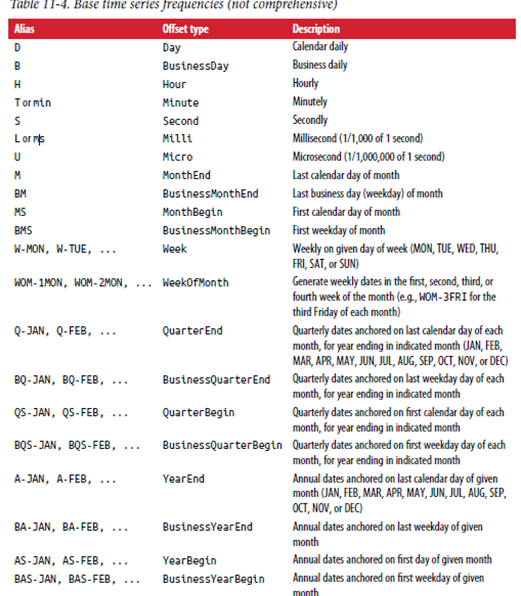

In [ ]:
#date_range by default preserves the time (if any) of the start or end timestamp:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
#Sometimes you will have start or end dates with time information but want to generate
#a set of timestamps normalized to midnight as a convention. To do this, there is a
#normalize option:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [ ]:
#Frequencies in pandas are composed of a base frequency and a multiplier. Base frequencies
#are typically referred to by a string alias, like 'M' for monthly or 'H' for
#hourly. For each base frequency, there is an object defined generally referred to as a
#date offset. For example, hourly frequency can be represented with the Hour class:

from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [ ]:
#You can define a multiple of an offset by passing an integer:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [ ]:
#you would never need to explicitly create one of these objects,
#instead using a string alias like 'H' or '4H'. Putting an integer before the 
#base frequency creates a multiple:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [ ]:
#Many offsets can be combined together by addition:
Hour(2) + Minute(30)

<150 * Minutes>

In [ ]:
#Similarly, you can pass frequency strings, like '1h30min', that will effectively be
#parsed to the same expression:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [ ]:
#One useful frequency class is “week of month,” starting with WOM. This enables you to
#get dates like the third Friday of each month:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [ ]:
#“Shifting” refers to moving data backward and forward through time. Both Series and
#DataFrame have a shift method for doing naive shifts forward or backward, leaving
#the index unmodified:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)
print(ts.shift(2))
ts.shift(-2)

#When we shift like this, missing data is introduced either at the start or the end of the
#time series.


2000-01-31    2.047573
2000-02-29    0.446691
2000-03-31   -0.223556
2000-04-30    0.092835
Freq: M, dtype: float64
2000-01-31         NaN
2000-02-29         NaN
2000-03-31    2.047573
2000-04-30    0.446691
Freq: M, dtype: float64


2000-01-31   -0.223556
2000-02-29    0.092835
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

A common use of shift is computing percent changes in a time series or multiple
time series as DataFrame columns. This is expressed as:

ts / ts.shift(1) - 1

In [ ]:
#Because naive shifts leave the index unmodified, some data is discarded. Thus if the
#frequency is known, it can be passed to shift to advance the timestamps instead of
#simply the data:
ts.shift(2, freq='M')

2000-03-31    2.047573
2000-04-30    0.446691
2000-05-31   -0.223556
2000-06-30    0.092835
Freq: M, dtype: float64

In [ ]:
#Other frequencies can be passed, too, giving you some flexibility in how to lead and
#lag the data:
ts.shift(3, freq='D')
ts.shift(1, freq='90T')

#The T here stands for minutes.

2000-01-31 01:30:00    2.047573
2000-02-29 01:30:00    0.446691
2000-03-31 01:30:00   -0.223556
2000-04-30 01:30:00    0.092835
dtype: float64

#### Shifting dates with offsets

In [ ]:
#The pandas date offsets can also be used with datetime or Timestamp objects
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [ ]:
#If you add an anchored offset like MonthEnd, the first increment will “roll forward” a
#date to the next date according to the frequency rule:
print(now + MonthEnd())
now + MonthEnd(2)

2011-11-30 00:00:00


Timestamp('2011-12-31 00:00:00')

In [ ]:
#Anchored offsets can explicitly “roll” dates forward or backward by simply using their
#rollforward and rollback methods, respectively:
offset = MonthEnd()
print(offset)
print(offset.rollforward(now))
offset.rollback(now)

<MonthEnd>
2011-11-30 00:00:00


Timestamp('2011-10-31 00:00:00')

In [ ]:
#A creative use of date offsets is to use these methods with groupby:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
print(ts)
ts.groupby(offset.rollforward).mean()

2000-01-15    0.716076
2000-01-19    0.657198
2000-01-23   -0.066748
2000-01-27    0.838639
2000-01-31   -0.117388
2000-02-04   -0.517795
2000-02-08   -0.116696
2000-02-12    2.389645
2000-02-16   -0.932454
2000-02-20   -0.229331
2000-02-24   -1.140330
2000-02-28    0.439920
2000-03-03   -0.823758
2000-03-07   -0.520930
2000-03-11    0.350282
2000-03-15    0.204395
2000-03-19    0.133445
2000-03-23    0.327905
2000-03-27    0.072153
2000-03-31    0.131678
Freq: 4D, dtype: float64


2000-01-31    0.405555
2000-02-29   -0.015291
2000-03-31   -0.015604
dtype: float64

In [ ]:
ts.resample('M').mean()

2000-01-31    0.405555
2000-02-29   -0.015291
2000-03-31   -0.015604
Freq: M, dtype: float64

## Time Zone Handling

In [ ]:
#Working with time zones is generally considered one of the most unpleasant parts of
#time series manipulation. As a result, many time series users choose to work with
#time series in coordinated universal time or UTC, which is the successor to Greenwich
#Mean Time and is the current international standard. Time zones are expressed as
#offsets from UTC; for example, New York is four hours behind UTC during daylight
#saving time and five hours behind the rest of the year.


#In Python, time zone information comes from the third-party pytz library (installable
#with pip or conda), which exposes the Olson database, a compilation of world
#time zone information. This is especially important for historical data because the
#daylight saving time (DST) transition dates (and even UTC offsets) have been
#changed numerous times depending on the whims of local governments. In the United
#States, the DST transition times have been changed many times since 1900!

#For detailed information about the pytz library, you’ll need to look at that library’s
#documentation. As far as this book is concerned, pandas wraps pytz’s functionality so
#you can ignore its API outside of the time zone names. Time zone names can be
#found interactively and in the docs

In [ ]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [ ]:
#To get a time zone object from pytz, use pytz.timezone:
tz = pytz.timezone('America/New_York')
tz

#Methods in pandas will accept either time zone names or these objects.

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [ ]:
#By default, time series in pandas are time zone naive. For example, consider the following
#time series:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.297459
2012-03-10 09:30:00    0.997747
2012-03-11 09:30:00    0.870955
2012-03-12 09:30:00   -0.991253
2012-03-13 09:30:00    0.151699
2012-03-14 09:30:00    1.266151
Freq: D, dtype: float64

In [ ]:
#The index’s tz field is None:
print(ts.index.tz)

None


In [ ]:
#Date ranges can be generated with a time zone set:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
#Conversion from naive to localized is handled by the tz_localize method:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
#Once a time series has been localized to a particular time zone, it can be converted to
#another time zone with tz_convert:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.297459
2012-03-10 04:30:00-05:00    0.997747
2012-03-11 05:30:00-04:00    0.870955
2012-03-12 05:30:00-04:00   -0.991253
2012-03-13 05:30:00-04:00    0.151699
2012-03-14 05:30:00-04:00    1.266151
Freq: D, dtype: float64

In [ ]:
#In the case of the preceding time series, which straddles a DST transition in the
#America/New_York time zone, we could localize to EST and convert to, say, UTC or Berlin
#time:
ts_eastern = ts.tz_localize('America/New_York')
print(ts_eastern.tz_convert('UTC'))
print(ts_eastern.tz_convert('Europe/Berlin'))

2012-03-09 14:30:00+00:00   -1.297459
2012-03-10 14:30:00+00:00    0.997747
2012-03-11 13:30:00+00:00    0.870955
2012-03-12 13:30:00+00:00   -0.991253
2012-03-13 13:30:00+00:00    0.151699
2012-03-14 13:30:00+00:00    1.266151
dtype: float64
2012-03-09 15:30:00+01:00   -1.297459
2012-03-10 15:30:00+01:00    0.997747
2012-03-11 14:30:00+01:00    0.870955
2012-03-12 14:30:00+01:00   -0.991253
2012-03-13 14:30:00+01:00    0.151699
2012-03-14 14:30:00+01:00    1.266151
dtype: float64


In [ ]:
#tz_localize and tz_convert are also instance methods on DatetimeIndex:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone−Aware Timestamp Objects

In [ ]:
#Similar to time series and date ranges, individual Timestamp objects similarly can be
#localized from naive to time zone–aware and converted from one time zone to
#another:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [ ]:
#You can also pass a time zone when creating the Timestamp:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [ ]:
#Time zone–aware Timestamp objects internally store a UTC timestamp value as 
#nanoseconds since the Unix epoch (January 1, 1970); this UTC value is invariant 
#between time zone conversions:
print(stamp_utc.value)
stamp_utc.tz_convert('America/New_York').value

1299902400000000000


1299902400000000000

In [ ]:
#When performing time arithmetic using pandas’s DateOffset objects, pandas
#respects daylight saving time transitions where possible. Here we construct 
#timestamps that occur right before DST transitions (forward and backward). 
#First, 30 minutes before transitioning to DST:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
print(stamp)
stamp + Hour()

2012-03-12 01:30:00-04:00


Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [ ]:
#90 minutes before transitioning out of DST:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
print(stamp)
stamp + 2 * Hour()

2012-11-04 00:30:00-04:00


Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [ ]:
#If two time series with different time zones are combined, the result will be UTC.
#Since the timestamps are stored under the hood in UTC, this is a straightforward
#operation and requires no conversion to happen:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

2012-03-07 09:30:00   -0.202469
2012-03-08 09:30:00    0.050718
2012-03-09 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
2012-03-15 09:30:00    0.522356
2012-03-16 09:30:00   -0.546348
2012-03-19 09:30:00   -0.733537
2012-03-20 09:30:00    1.302736
Freq: B, dtype: float64


DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and Period Arithmetic

In [ ]:
#Periods represent timespans, like days, months, quarters, or years. The Period class
#represents this data type, requiring a string or integer and a frequency
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [ ]:
print(p + 5)
print(p - 2)

2012
2005


In [ ]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [ ]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [ ]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.022199
2000-02    0.364287
2000-03   -0.922839
2000-04    0.312656
2000-05   -1.128497
2000-06   -0.333488
Freq: M, dtype: float64

In [ ]:
#If you have an array of strings, you can also use the PeriodIndex class:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [ ]:
#Periods and PeriodIndex objects can be converted to another frequency with their
#asfreq method. As an example, suppose we had an annual period and wanted to
#convert it into a monthly period either at the start or end of the year. This is fairly
#straightforward:
p = pd.Period('2007', freq='A-DEC')
print(p)
print(p.asfreq('M', how='start'))
p.asfreq('M', how='end')

2007
2007-01


Period('2007-12', 'M')

In [ ]:
#You can think of Period('2007', 'A-DEC') as being a sort of cursor pointing to a
#span of time, subdivided by monthly periods. 
# For a fiscal year ending on a month other than December, the corresponding
#monthly subperiods are different:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2007-06', 'M')

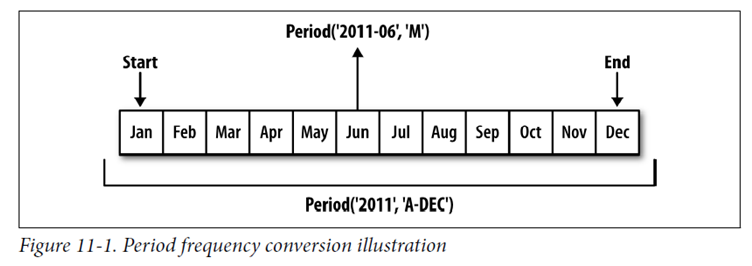

In [ ]:
#When you are converting from high to low frequency, pandas determines the superperiod
#depending on where the subperiod “belongs.” For example, in A-JUN frequency,
#the month Aug-2007 is actually part of the 2008 period:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [ ]:
#Whole PeriodIndex objects or time series can be similarly converted with the same
#semantics:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ts.asfreq('M', how='start')

2006   -0.514551
2007   -0.559782
2008   -0.783408
2009   -1.797685
Freq: A-DEC, dtype: float64


2006-01   -0.514551
2007-01   -0.559782
2008-01   -0.783408
2009-01   -1.797685
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

2006-12-29   -0.514551
2007-12-31   -0.559782
2008-12-31   -0.783408
2009-12-31   -1.797685
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [ ]:
#Quarterly data is standard in accounting, finance, and other fields. Much quarterly
#data is reported relative to a fiscal year end, typically the last calendar or business day
#of one of the 12 months of the year. Thus, the period 2012Q4 has a different meaning
#depending on fiscal year end. pandas supports all 12 possible quarterly frequencies as
#Q-JAN through Q-DEC:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In the case of fiscal year ending in January, 2012Q4 runs from November through January, which you can check by converting to daily frequency.

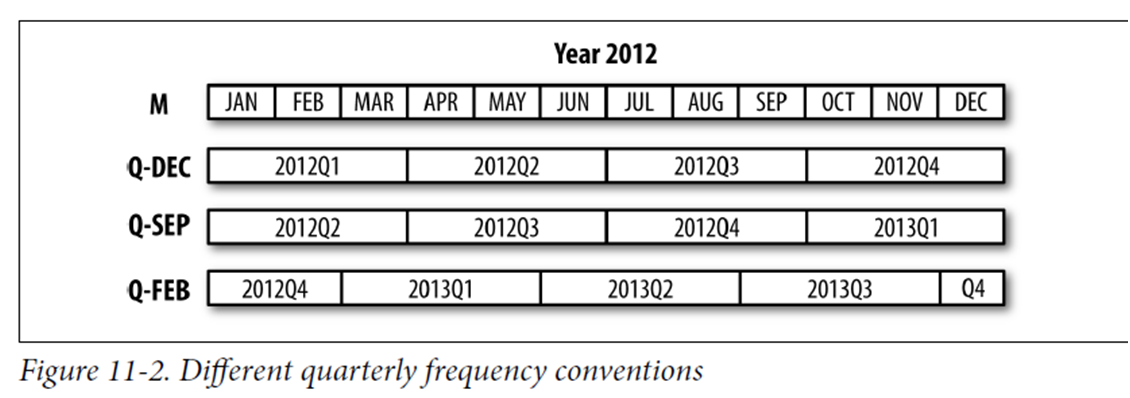

In [ ]:
print(p.asfreq('D', 'start'))
p.asfreq('D', 'end')

2011-11-01


Period('2012-01-31', 'D')

In [ ]:
#for example, to get the timestamp at 4PM on the second-to-last business day of the quarter:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [ ]:
#You can generate quarterly ranges using period_range. Arithmetic is identical, too:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
print(ts)
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [ ]:
#Series and DataFrame objects indexed by timestamps can be converted to periods
#with the to_period method:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
print(ts)
pts = ts.to_period()
pts

2000-01-31   -0.172670
2000-02-29    0.680215
2000-03-31    1.607578
Freq: M, dtype: float64


2000-01   -0.172670
2000-02    0.680215
2000-03    1.607578
Freq: M, dtype: float64

In [ ]:
#Since periods refer to non-overlapping timespans, a timestamp can only belong to a
#single period for a given frequency. While the frequency of the new PeriodIndex is
#inferred from the timestamps by default, you can specify any frequency you want.
#There is also no problem with having duplicate periods in the result:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
print(ts2)
ts2.to_period('M')

2000-01-29    0.200381
2000-01-30   -0.834068
2000-01-31   -0.302988
2000-02-01    1.663261
2000-02-02   -0.996206
2000-02-03    1.521760
Freq: D, dtype: float64


2000-01    0.200381
2000-01   -0.834068
2000-01   -0.302988
2000-02    1.663261
2000-02   -0.996206
2000-02    1.521760
Freq: M, dtype: float64

In [ ]:
#To convert back to timestamps, use to_timestamp:
pts = ts2.to_period()
print(pts)
pts.to_timestamp(how='end')

2000-01-29    0.200381
2000-01-30   -0.834068
2000-01-31   -0.302988
2000-02-01    1.663261
2000-02-02   -0.996206
2000-02-03    1.521760
Freq: D, dtype: float64


2000-01-29 23:59:59.999999999    0.200381
2000-01-30 23:59:59.999999999   -0.834068
2000-01-31 23:59:59.999999999   -0.302988
2000-02-01 23:59:59.999999999    1.663261
2000-02-02 23:59:59.999999999   -0.996206
2000-02-03 23:59:59.999999999    1.521760
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [ ]:
#Fixed frequency datasets are sometimes stored with timespan information spread
#across multiple columns. For example, in this macroeconomic dataset, the year and
#quarter are in different columns:
data = pd.read_csv('macrodata.csv')
#data.head(5)
data.year
data.quarter
type(data)

pandas.core.frame.DataFrame

In [ ]:
#By passing these arrays to PeriodIndex with a frequency, you can combine them to
#form an index for the DataFrame:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
print(index)
data.index = index
data.infl

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')


1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

In [ ]:
#Resampling refers to the process of converting a time series from one frequency to another. 

#Aggregating higher frequency data to lower frequency is called downsampling,

#while converting lower frequency to higher frequency is called upsampling. 

#Not all resampling falls into either of these categories; 
#for example, converting W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downsampling.

#pandas objects are equipped with a resample method, which is the workhorse function for all frequency conversion. 

#resample has a similar API to groupby; you call resample to group the data, then call an aggregation function:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ts.resample('M').mean()
ts.resample('M', kind='period').mean()


#resample is a flexible and high-performance method that can be used to process very
#large time series.

2000-01-01    0.244175
2000-01-02    0.423331
2000-01-03   -0.654040
2000-01-04    2.089154
2000-01-05   -0.060220
                ...   
2000-04-05    0.517564
2000-04-06   -0.007852
2000-04-07   -1.638806
2000-04-08    1.401227
2000-04-09    1.758539
Freq: D, Length: 100, dtype: float64


2000-01   -0.024575
2000-02   -0.033214
2000-03    0.158704
2000-04    0.475076
Freq: M, dtype: float64

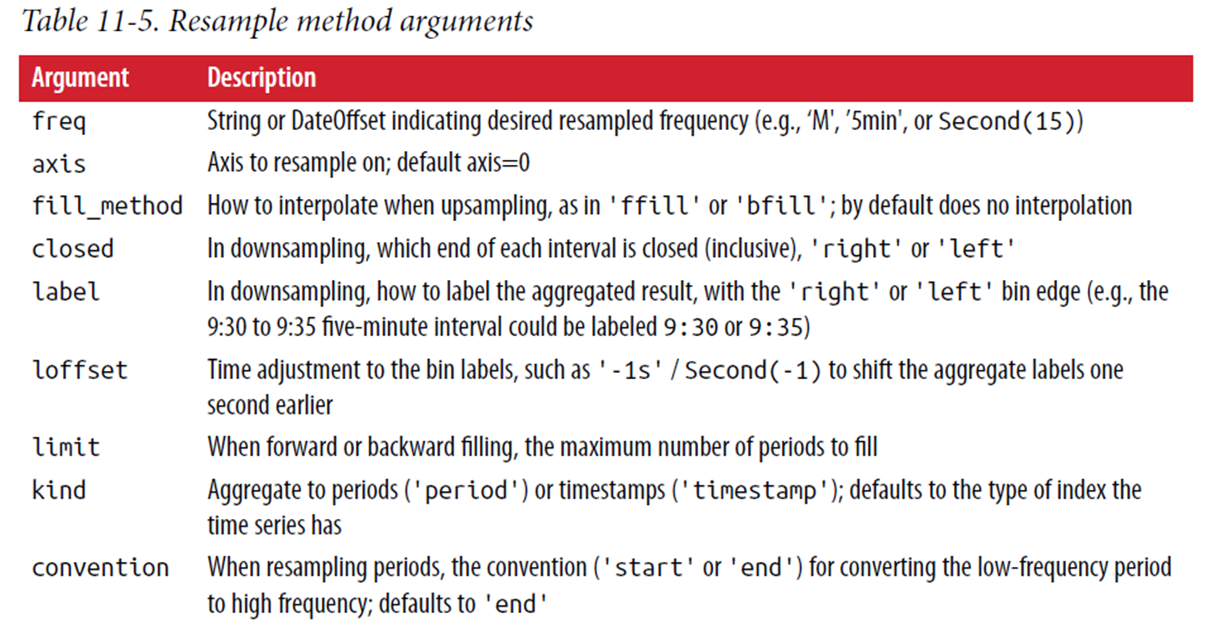

### Downsampling

In [ ]:
#Aggregating data to a regular, lower frequency is a pretty normal time series task. 
#The data you’re aggregating doesn’t need to be fixed frequently; 
#the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. 
#For example, to convert to monthly, 'M' or 'BM', you need to chop up the data into one month intervals. 
#Each interval is said to be half-open; a data point can only belong to one interval, 
#and the union of the intervals must make up the whole time frame.

#There are a couple things to think about when using resample to downsample data:
#• Which side of each interval is closed
#• How to label each aggregated bin, either with the start of the interval or the end

In [ ]:
#let’s look at some one-minute data:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [ ]:
#aggregate this data into five-minute chunks or bars by taking
#the sum of each group:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [ ]:
#The frequency you pass defines bin edges in five-minute increments. By default,
#the left bin edge is inclusive, so the 00:00 value is included in the 00:00 to 00:05
#interval.Passing closed='right' changes the interval to be closed on the right:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

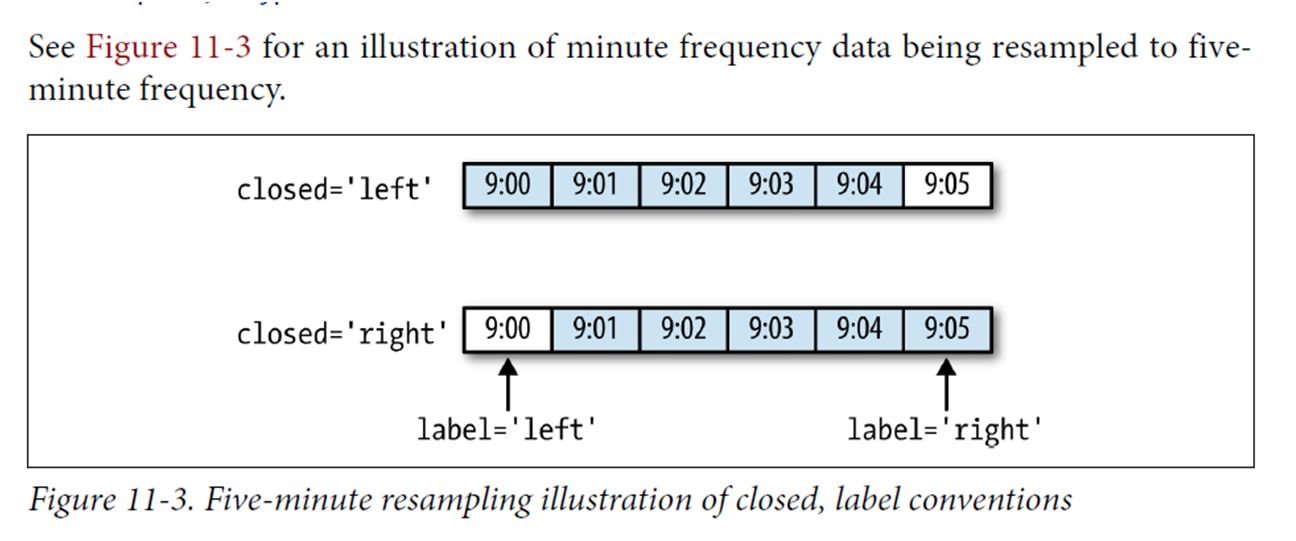

In [ ]:
#The resulting time series is labeled by the timestamps from the left side of each bin.
#By passing label='right' you can label them with the right bin edge:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [ ]:
#you might want to shift the result index by some amount, say subtracting one
#second from the right edge to make it more clear which interval the timestamp refers
#to. To do this, pass a string or date offset to loffset:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [ ]:
#In finance, a popular way to aggregate a time series is to compute four values for each
#bucket: the first (open), last (close), maximum (high), and minimal (low) values. By
#using the ohlc aggregate function you will obtain a DataFrame having columns containing
#these four aggregates, which are efficiently computed in a single sweep of the data:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [ ]:
#When converting from a low frequency to a higher frequency, no aggregation is
#needed. Let’s consider a DataFrame with some weekly data:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.628932,-0.423776,0.789740,0.937568
2000-01-12,-2.253294,-1.772919,-0.896431,0.677263


In [ ]:
#When you are using an aggregation function with this data, there is only one value
#per group, and missing values result in the gaps. We use the asfreq method to convert
#to the higher frequency without any aggregation:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.628932,-0.423776,0.789740,0.937568
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.253294,-1.772919,-0.896431,0.677263


In [ ]:
#Suppose you wanted to fill forward each weekly value on the non-Wednesdays. The
#same filling or interpolation methods available in the fillna and reindex methods
#are available for resampling:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.628932,-0.423776,0.789740,0.937568
2000-01-06,0.628932,-0.423776,0.789740,0.937568
2000-01-07,0.628932,-0.423776,0.789740,0.937568
2000-01-08,0.628932,-0.423776,0.789740,0.937568
2000-01-09,0.628932,-0.423776,0.789740,0.937568
2000-01-10,0.628932,-0.423776,0.789740,0.937568
2000-01-11,0.628932,-0.423776,0.789740,0.937568
2000-01-12,-2.253294,-1.772919,-0.896431,0.677263


In [ ]:
#You can similarly choose to only fill a certain number of periods forward to limit how
#far to continue using an observed value:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.628932,-0.423776,0.789740,0.937568
2000-01-06,0.628932,-0.423776,0.789740,0.937568
2000-01-07,0.628932,-0.423776,0.789740,0.937568
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.253294,-1.772919,-0.896431,0.677263


In [ ]:
#the new date index need not overlap with the old one at all:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.628932,-0.423776,0.789740,0.937568
2000-01-13,-2.253294,-1.772919,-0.896431,0.677263


### Resampling with Periods

In [ ]:
#Resampling data indexed by periods is similar to timestamps:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.306142,-0.032316,0.434218,0.023835
2001,0.165469,-0.305790,0.116549,0.333894


In [ ]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.306142,-0.032316,0.434218,0.023835
2001Q1,0.306142,-0.032316,0.434218,0.023835
2001Q2,0.306142,-0.032316,0.434218,0.023835
2001Q3,0.306142,-0.032316,0.434218,0.023835
2001Q4,0.165469,-0.305790,0.116549,0.333894


In [ ]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.306142,-0.032316,0.434218,0.023835
2001Q1,0.306142,-0.032316,0.434218,0.023835
2001Q2,0.306142,-0.032316,0.434218,0.023835
2001Q3,0.306142,-0.032316,0.434218,0.023835
2001Q4,0.165469,-0.305790,0.116549,0.333894
2002Q1,0.165469,-0.305790,0.116549,0.333894
2002Q2,0.165469,-0.305790,0.116549,0.333894
2002Q3,0.165469,-0.305790,0.116549,0.333894


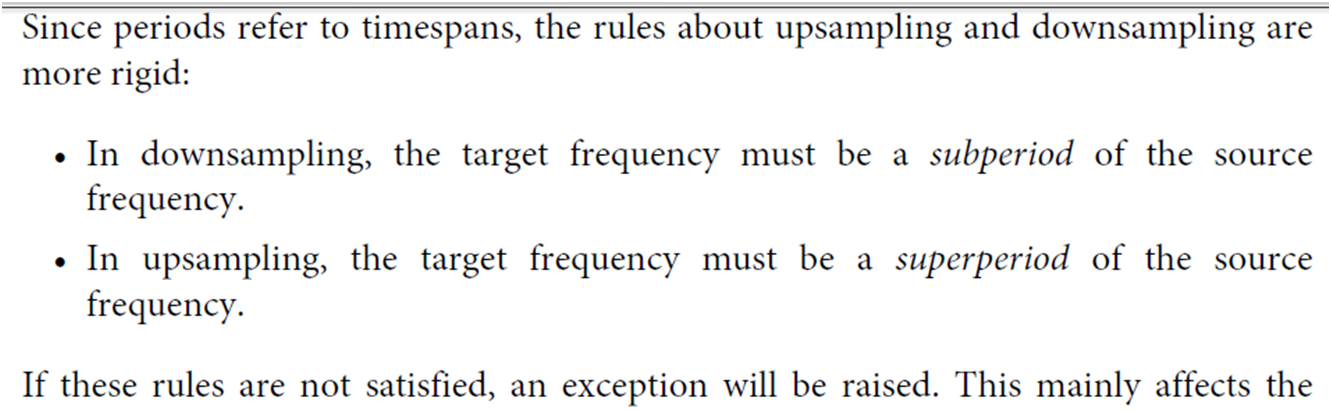

## Moving Window Functions

In [ ]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

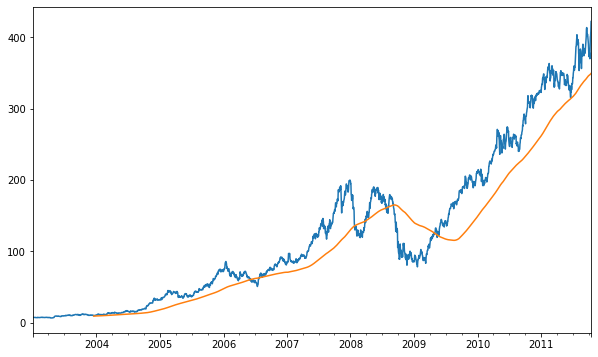

In [ ]:
#the rolling operator, behaves similarly to resample and groupby. It can  be called on a 
#Series or DataFrame along with a window expressed as a number of periods;
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

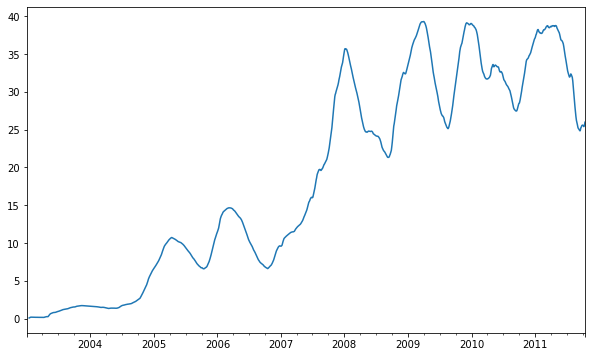

In [ ]:
#The expression rolling(250) is similar in behavior to groupby, but instead of grouping
#it creates an object that enables grouping over a 250-day sliding window.
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()


#By default rolling functions require all of the values in the window to be non-NA.
#This behavior can be changed to account for missing data and, in particular, the fact
#that you will have fewer than window periods of data at the beginning of the time
#series

In [ ]:
#In order to compute an expanding window mean, use the expanding operator instead
#of rolling. The expanding mean starts the time window from the beginning of the
#time series and increases the size of the window until it encompasses the whole series.
#An expanding window mean on the apple_std250 time series looks like this:
expanding_mean = appl_std250.expanding().mean()


#Calling a moving window function on a DataFrame applies the transformation to
#each column

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

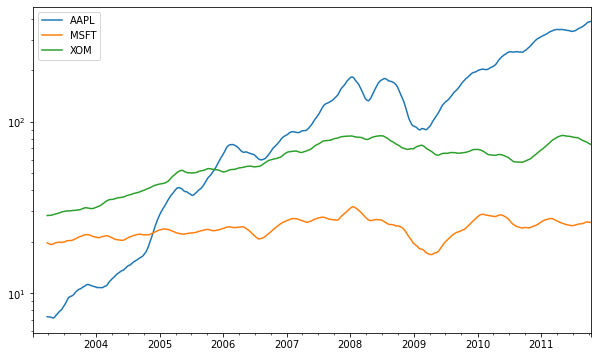

In [ ]:
close_px.rolling(60).mean().plot(logy=True)

In [ ]:
#The rolling function also accepts a string indicating a fixed-size time offset rather
#than a set number of periods. Using this notation can be useful for irregular time series.
#These are the same strings that you can pass to resample. For example, we could
#compute a 20-day rolling mean like so:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [ ]:

plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

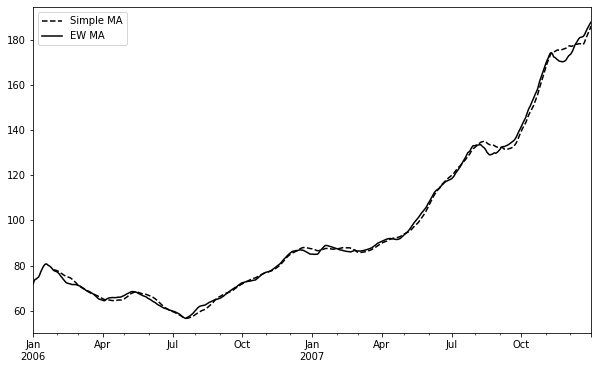

In [ ]:
#An alternative to using a static window size with equally weighted observations is to
#specify a constant decay factor to give more weight to more recent observations.
#There are a couple of ways to specify the decay factor. A popular one is using a span,
#which makes the result comparable to a simple moving window function with window
#size equal to the span.

#Since an exponentially weighted statistic places more weight on more recent observations,
#it “adapts” faster to changes compared with the equal-weighted version.
#pandas has the ewm operator to go along with rolling and expanding. Here’s an
#example comparing a 60-day moving average of Apple’s stock price with an EW moving
#average with span=60
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [ ]:
plt.figure()
#Some statistical operators, like correlation and covariance, need to operate on two
#time series. As an example, financial analysts are often interested in a stock’s correlation
#to a benchmark index like the S&P 500. To have a look at this, we first compute
#the percent change for all of our time series of interest:

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

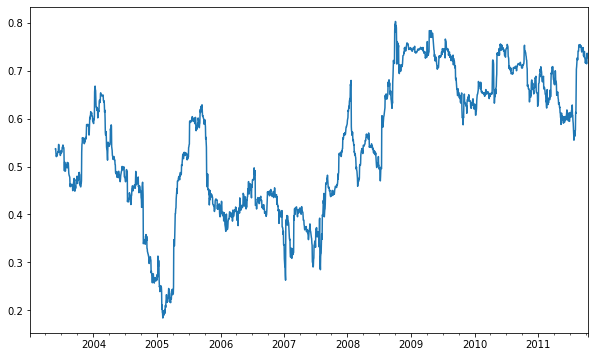

In [ ]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

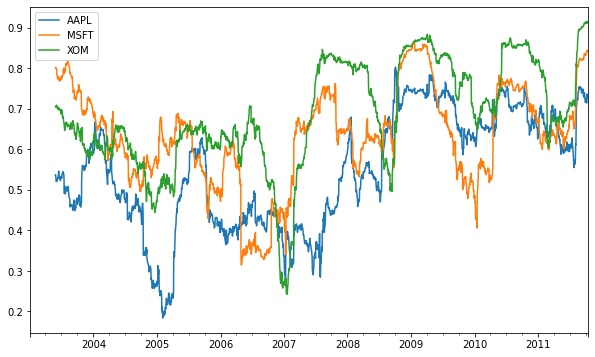

In [ ]:
#The corr aggregation function after we call rolling can then compute the rolling
#correlation with spx_rets
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

#Suppose you wanted to compute the correlation of the S&P 500 index with many
#stocks at once. Writing a loop and creating a new DataFrame would be easy but might
#get repetitive, so if you pass a Series and a DataFrame, a function like rolling_corr
#will compute the correlation of the Series (spx_rets, in this case) with each column
#in the DataFrame

### User-Defined Moving Window Functions

In [ ]:
plt.figure()
#The apply method on rolling and related methods provides a means to apply an
#array function of your own devising over a moving window. The only requirement is
#that the function produce a single value (a reduction) from each piece of the array.
#For example, while we can compute sample quantiles using rolling(...).quan
#tile(q), we might be interested in the percentile rank of a particular value over the
#sample. The scipy.stats.percentileofscore function does just this

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

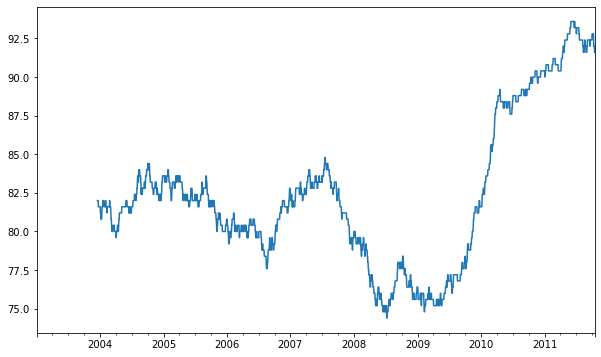

In [ ]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion